Set up
We need to first load in our data points

In [1]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import math
import numpy as np

In [2]:
#each bond is in the structure (price,rate,yr_till_maturity,issue_date,data_date,maturity_date)
bonds6 = [(99.73,0.0125,3/12,'10-1-2019','01-06-2025','03-01-2025'), (98.4,0.005,9/12,'04-03-2020','01-06-2025','09-01-2025'), (96.99,0.0025,15/12,'10-09-2020','01-06-2025','03-01-2026'), (97.01,0.01,21/12,'04-16-2021','01-06-2025','09-01-2026'), (96.62,0.0125,27/12,'10-15-2021','01-06-2025','03-01-2027'), (99.63,0.0275,33/12,'05-13-2022','01-06-2025','09-01-2027'), (101.82,0.035,39/12,'10-21-2022','01-06-2025','03-01-2028'), (101.1,0.0325,45/12,'04-21-2023','01-06-2025','09-01-2028'), (104.07,0.04,51/12,'10-13-2023','01-06-2025','03-01-2029'), (102.22,0.035,57/12,'04-08-2024','01-06-2025','09-01-2029'), (98.81,0.0275,63/12,'10-03-2024','01-06-2025','03-01-2030')]
bonds7 = [(99.73,0.0125,3/12,'10-1-2019','01-07-2025','03-01-2025'), (98.41,0.005,9/12,'04-03-2020','01-07-2025','09-01-2025'), (96.98,0.0025,15/12,'10-09-2020','01-07-2025','03-01-2026'), (96.99,0.01,21/12,'04-16-2021','01-07-2025','09-01-2026'), (96.59,0.0125,27/12,'10-15-2021','01-07-2025','03-01-2027'), (99.56,0.0275,33/12,'05-13-2022','01-07-2025','09-01-2027'), (101.82,0.035,39/12,'10-21-2022','01-07-2025','03-01-2028'), (101.14,0.0325,45/12,'04-21-2023','01-07-2025','09-01-2028'), (104.01,0.04,51/12,'10-13-2023','01-07-2025','03-01-2029'), (102.14,0.035,57/12,'04-08-2024','01-07-2025','09-01-2029'), (98.6,0.0275,63/12,'10-03-2024','01-07-2025','03-01-2030')]
bonds8 = [(99.74,0.0125,3/12,'10-1-2019','01-08-2025','03-01-2025'), (98.4,0.005,9/12,'04-03-2020','01-08-2025','09-01-2025'), (96.97,0.0025,15/12,'10-09-2020','01-08-2025','03-01-2026'), (97,0.01,21/12,'04-16-2021','01-08-2025','09-01-2026'), (96.58,0.0125,27/12,'10-15-2021','01-08-2025','03-01-2027'), (99.54,0.0275,33/12,'05-13-2022','01-08-2025','09-01-2027'), (101.7,0.035,39/12,'10-21-2022','01-08-2025','03-01-2028'), (100.99,0.0325,45/12,'04-21-2023','01-08-2025','09-01-2028'), (103.9,0.04,51/12,'10-13-2023','01-08-2025','03-01-2029'), (102.04,0.035,57/12,'04-08-2024','01-08-2025','09-01-2029'), (98.53,0.0275,63/12,'10-03-2024','01-08-2025','03-01-2030')]
bonds9 = [(99.73,0.0125,3/12,'10-1-2019','01-09-2025','03-01-2025'), (98.42,0.005,9/12,'04-03-2020','01-09-2025','09-01-2025'), (97,0.0025,15/12,'10-09-2020','01-09-2025','03-01-2026'), (97.03,0.01,21/12,'04-16-2021','01-09-2025','09-01-2026'), (96.63,0.0125,27/12,'10-15-2021','01-09-2025','03-01-2027'), (99.58,0.0275,33/12,'05-13-2022','01-09-2025','09-01-2027'), (101.72,0.035,39/12,'10-21-2022','01-09-2025','03-01-2028'), (100.94,0.0325,45/12,'04-21-2023','01-09-2025','09-01-2028'), (103.87,0.04,51/12,'10-13-2023','01-09-2025','03-01-2029'), (101.98,0.035,57/12,'04-08-2024','01-09-2025','09-01-2029'), (98.54,0.0275,63/12,'10-03-2024','01-09-2025','03-01-2030')]
bonds10 = [(99.74,0.0125,3/12,'10-1-2019','01-10-2025','03-01-2025'), (98.37,0.005,9/12,'04-03-2020','01-10-2025','09-01-2025'), (96.9,0.0025,15/12,'10-09-2020','01-10-2025','03-01-2026'), (96.86,0.01,21/12,'04-16-2021','01-10-2025','09-01-2026'), (96.39,0.0125,27/12,'10-15-2021','01-10-2025','03-01-2027'), (99.27,0.0275,33/12,'05-13-2022','01-10-2025','09-01-2027'), (101.52,0.035,39/12,'10-21-2022','01-10-2025','03-01-2028'), (100.79,0.0325,45/12,'04-21-2023','01-10-2025','09-01-2028'), (103.53,0.04,51/12,'10-13-2023','01-10-2025','03-01-2029'), (101.59,0.035,57/12,'04-08-2024','01-10-2025','09-01-2029'), (97.96,0.0275,63/12,'10-03-2024','01-10-2025','03-01-2030')]
bonds13 = [(99.73,0.0125,3/12,'10-1-2019','01-13-2025','03-01-2025'), (98.36,0.005,9/12,'04-03-2020','01-13-2025','09-01-2025'), (96.91,0.0025,15/12,'10-09-2020','01-13-2025','03-01-2026'), (96.77,0.01,21/12,'04-16-2021','01-13-2025','09-01-2026'), (96.28,0.0125,27/12,'10-15-2021','01-13-2025','03-01-2027'), (99.13,0.0275,33/12,'05-13-2022','01-13-2025','09-01-2027'), (101.26,0.035,39/12,'10-21-2022','01-13-2025','03-01-2028'), (100.49,0.0325,45/12,'04-21-2023','01-13-2025','09-01-2028'), (103.29,0.04,51/12,'10-13-2023','01-13-2025','03-01-2029'), (101.28,0.035,57/12,'04-08-2024','01-13-2025','09-01-2029'), (97.61,0.0275,63/12,'10-03-2024','01-13-2025','03-01-2030')]
bonds14 = [(99.73,0.0125,3/12,'10-1-2019','01-14-2025','03-01-2025'), (98.36,0.005,9/12,'04-03-2020','01-14-2025','09-01-2025'), (96.98,0.0025,15/12,'10-09-2020','01-14-2025','03-01-2026'), (96.71,0.01,21/12,'04-16-2021','01-14-2025','09-01-2026'), (96.19,0.0125,27/12,'10-15-2021','01-14-2025','03-01-2027'), (99.02,0.0275,33/12,'05-13-2022','01-14-2025','09-01-2027'), (101.02,0.035,39/12,'10-21-2022','01-14-2025','03-01-2028'), (100.19,0.0325,45/12,'04-21-2023','01-14-2025','09-01-2028'), (102.99,0.04,51/12,'10-13-2023','01-14-2025','03-01-2029'), (101,0.035,57/12,'04-08-2024','01-14-2025','09-01-2029'), (97.38,0.0275,63/12,'10-03-2024','01-14-2025','03-01-2030')]
bonds15 = [(99.77,0.0125,3/12,'10-1-2019','01-15-2025','03-01-2025'), (98.4,0.005,9/12,'04-03-2020','01-15-2025','09-01-2025'), (96.9,0.0025,15/12,'10-09-2020','01-15-2025','03-01-2026'), (96.85,0.01,21/12,'04-16-2021','01-15-2025','09-01-2026'), (96.36,0.0125,27/12,'10-15-2021','01-15-2025','03-01-2027'), (99.2,0.0275,33/12,'05-13-2022','01-15-2025','09-01-2027'), (101.24,0.035,39/12,'10-21-2022','01-15-2025','03-01-2028'), (100.42,0.0325,45/12,'04-21-2023','01-15-2025','09-01-2028'), (103.24,0.04,51/12,'10-13-2023','01-15-2025','03-01-2029'), (101.27,0.035,57/12,'04-08-2024','01-15-2025','09-01-2029'), (97.76,0.0275,63/12,'10-03-2024','01-15-2025','03-01-2030')]
bonds16 = [(99.78,0.0125,3/12,'10-1-2019','01-16-2025','03-01-2025'), (98.47,0.005,9/12,'04-03-2020','01-16-2025','09-01-2025'), (97.01,0.0025,15/12,'10-09-2020','01-16-2025','03-01-2026'), (97.03,0.01,21/12,'04-16-2021','01-16-2025','09-01-2026'), (96.6,0.0125,27/12,'10-15-2021','01-16-2025','03-01-2027'), (99.5,0.0275,33/12,'05-13-2022','01-16-2025','09-01-2027'), (101.58,0.035,39/12,'10-21-2022','01-16-2025','03-01-2028'), (100.92,0.0325,45/12,'04-21-2023','01-16-2025','09-01-2028'), (103.8,0.04,51/12,'10-13-2023','01-16-2025','03-01-2029'), (101.85,0.035,57/12,'04-08-2024','01-16-2025','09-01-2029'), (98.4,0.0275,63/12,'10-03-2024','01-16-2025','03-01-2030')]
bonds17 = [(99.8,0.0125,3/12,'10-1-2019','01-17-2025','03-01-2025'), (98.5,0.005,9/12,'04-03-2020','01-17-2025','09-01-2025'), (97.06,0.0025,15/12,'10-09-2020','01-17-2025','03-01-2026'), (97.07,0.01,21/12,'04-16-2021','01-17-2025','09-01-2026'), (96.64,0.0125,27/12,'10-15-2021','01-17-2025','03-01-2027'), (99.53,0.0275,33/12,'05-13-2022','01-17-2025','09-01-2027'), (101.65,0.035,39/12,'10-21-2022','01-17-2025','03-01-2028'), (101.02,0.0325,45/12,'04-21-2023','01-17-2025','09-01-2028'), (104.07,0.04,51/12,'10-13-2023','01-17-2025','03-01-2029'), (101.97,0.035,57/12,'04-08-2024','01-17-2025','09-01-2029'), (98.47,0.0275,63/12,'10-03-2024','01-17-2025','03-01-2030')]
bonds20 = [(99.8,0.0125,3/12,'10-1-2019','01-20-2025','03-01-2025'), (98.53,0.005,9/12,'04-03-2020','01-20-2025','09-01-2025'), (97.1,0.0025,15/12,'10-09-2020','01-20-2025','03-01-2026'), (97.11,0.01,21/12,'04-16-2021','01-20-2025','09-01-2026'), (96.69,0.0125,27/12,'10-15-2021','01-20-2025','03-01-2027'), (99.61,0.0275,33/12,'05-13-2022','01-20-2025','09-01-2027'), (101.71,0.035,39/12,'10-21-2022','01-20-2025','03-01-2028'), (101.11,0.0325,45/12,'04-21-2023','01-20-2025','09-01-2028'), (104.07,0.04,51/12,'10-13-2023','01-20-2025','03-01-2029'), (102.13,0.035,57/12,'04-08-2024','01-20-2025','09-01-2029'), (98.69,0.0275,63/12,'10-03-2024','01-20-2025','03-01-2030')]

Part A
-Get YTM of each bond
-Graph 5 year yield curve for each day

In [3]:
#Helper function to obtain the number of days between two dates.
def days_between_dates(date1, date2):
    # Convert the date strings to datetime objects
    date_format = "%m-%d-%Y"
    dt1 = datetime.strptime(date1, date_format)
    dt2 = datetime.strptime(date2, date_format)
    
    # Calculate the difference in days
    delta = (dt2 - dt1).days
    
    return delta

# Helper to add 6 months to a date
def add_six_months(input_date):
    date_format = "%m-%d-%Y"
    dt = datetime.strptime(input_date, date_format)
    
    # Add 6 months using relativedelta
    new_dt = dt + relativedelta(months=+6)
    
    # Convert the resulting datetime object back to a string
    new_date = new_dt.strftime(date_format)
    
    return new_date

# Helper function that loops until the last coupon payment P and calculates the num of days until maturity
def last_coupon_to_data_date_days(issue_date, data_date):
        new_date = issue_date
        ret_days = days_between_dates(new_date, data_date)
        while (ret_days >= 180):
            new_date = add_six_months(new_date)
            ret_days = days_between_dates(new_date, data_date)
        return ret_days

#Helper to calculate the index of coupon payment
def coupon_index(issue_date, data_date, maturity_date):
    ret_cpn_index = []
    coupon_dates = []
    dt_issue_date = datetime.strptime(issue_date, '%m-%d-%Y')
    dt_data_date = datetime.strptime(data_date, '%m-%d-%Y')
    dt_mt_date = datetime.strptime(maturity_date, '%m-%d-%Y')
    while dt_issue_date < dt_mt_date:
        coupon_dates.append(dt_issue_date)
        #Increasing by 6 months.
        dt_issue_date = dt_issue_date + relativedelta(months=+6)
    for date in coupon_dates:
        if date > dt_data_date:
            diff = relativedelta(date,dt_data_date)
            months_between = diff.years * 12 + diff.months
            if diff.days > 15:
                months_between += 1
            ret_cpn_index.append(months_between)
    return ret_cpn_index

#Helper to determine the number of months in between two dates
def months_between_dates(date1, date2):
    dt_date1 = datetime.strptime(date1, '%m-%d-%Y')
    dt_date2 = datetime.strptime(date2, '%m-%d-%Y')
    diff = relativedelta(dt_date1,dt_date2)
    months_between = diff.years * 12 + diff.months
    if diff.days> 15:
        months_between += 1
    return months_between

# Helper to get the index of 
def linear_interpolate(x1,y1,x2,y2,target):
    m = (y2-y1)/(x2-x1)
    b = y1-m*x1
    value = m*target+b
    return value

#Function to Obtain Yields of given day
def yield_on_day(bonds):
    #Intialize the yields; eg. index 1 gives r_1, the yield in 1 month. 62Months here
    ret_yields = [0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,0,0]
    i = 0
    for bond in bonds:
        #Calculation of Dirty Price
        coupon_interest = bond[1]
        time_since_coupon = last_coupon_to_data_date_days(bond[3],bond[4])
        accured_interest = (time_since_coupon/365) * (coupon_interest * 100)
        dirty_price = bond[0] + accured_interest
        
        coupon = 100*coupon_interest/2
        
        #Hereby I present the most caveman function one could ever construct using 11 if statements.
        #I didn't see the structure of coupon payments at first...now I see it, I'm sure I didn't have to use 11 if statments.
        #The newer code would follow the same logic though, approximate by nearest value, and only difference would be in 
        #having a formula to discount all the cashflows.
        
        #Zero bond
        if i == 0:
            r2 = -6*math.log(dirty_price/(coupon + 100))
            #r2
            ret_yields[1] = r2
                
        #B2
        if i == 1:
            ret_yields[2] = ret_yields[1] #Approximate by previous value
            r3 = ret_yields[2]
            r8 = -(12/8)*math.log((dirty_price - coupon*(math.exp(-r3*(3/12))))/(100+coupon))
            ret_yields[7] = r8
        
        #B3
        if i == 2:
            r3 = ret_yields[2]
            r9 = ret_yields[7] #Approximate by previous
            ret_yields[8] = r9 
            r14 = -(12/14)*math.log((dirty_price - coupon*(math.exp(-r3*(3/12)))-coupon*(math.exp(-r9*(9/12))))/(100+coupon))
            ret_yields[13] = r14
        
        #B4
        if i == 3:
            r3 = ret_yields[2]
            r9 = ret_yields[8]
            r15 = ret_yields[13]
            ret_yields[14] = r15 #Approximate by previous
            r20 = -(12/20)*math.log((dirty_price - coupon*(math.exp(-r3*(3/12)) + math.exp(-r9*(9/12)) + math.exp(-r15*(15/12))))/(100+coupon))
            ret_yields[19] = r20
        
        #B5
        if i == 4:
            r3 = ret_yields[2]
            r9 = ret_yields[8]
            r15 = ret_yields[13]
            r20 = ret_yields[19]
            ret_yields[20] = r20
            r21 = ret_yields[20] #approximate by previous value
            r26 = -(12/26)*math.log((dirty_price - coupon*(math.exp(-r3*(3/12)) + math.exp(-r9*(9/12)) + math.exp(-r15*(15/12)) + math.exp(-r21*(21/12))))/(100+coupon))
            ret_yields[25] = r26
            
        #B6
        if i == 5:
            #Interpolating by linear approx.
            ret_yields[3] = linear_interpolate(3,ret_yields[2],8,ret_yields[7],4)
            ret_yields[9] = linear_interpolate(9,ret_yields[8],14,ret_yields[13],10)
            ret_yields[15] = linear_interpolate(15,ret_yields[14],20,ret_yields[19],16)
            ret_yields[21] = linear_interpolate(21,ret_yields[20],26,ret_yields[25],22)
            ret_yields[26] = linear_interpolate(21,ret_yields[20],26,ret_yields[25],27) #Extending previous linear trend
            ret_yields[27] = linear_interpolate(21,ret_yields[20],26,ret_yields[25],28) #Extending previous linear trend
            r4 = ret_yields[3]
            r10 = ret_yields[9]
            r16 = ret_yields[15]
            r22 = ret_yields[21]
            r28 = ret_yields[27]
            r32 = -(12/32)*math.log((dirty_price - coupon*(math.exp(-r4*(4/12)) + math.exp(-r10*(10/12)) + math.exp(-r16*(16/12)) + math.exp(-r22*(22/12)) + math.exp(-r28*(28/12))))/(100+coupon))
            ret_yields[31] = r32
            
        #B7
        if i == 6:
            r3 = ret_yields[2]
            r9 = ret_yields[8]
            r15 = ret_yields[13]
            r21 = ret_yields[20]
            r27 = ret_yields[26]
            r33 = ret_yields[31] #Approximate by previous value
            ret_yields[32] = r33
            r38 = -(12/38)*math.log((dirty_price - coupon*(math.exp(-r3*(3/12)) + math.exp(-r9*(9/12)) + math.exp(-r15*(15/12)) + math.exp(-r21*(21/12)) + math.exp(-r27*(27/12)) + math.exp(-r33*(33/12))))/(100+coupon))
            ret_yields[37] = r38
        
        #B8
        if i==7:
            r3 = ret_yields[2]
            r9 = ret_yields[8]
            r15 = ret_yields[13]
            r21 = ret_yields[20]
            r27 = ret_yields[26]
            r33 = ret_yields[31]
            r39 = ret_yields[37] #Approximate by previous value
            ret_yields[38] = r39
            r44 = -(12/44)*math.log((dirty_price - coupon*(math.exp(-r3*(3/12)) + math.exp(-r9*(9/12)) + math.exp(-r15*(15/12)) + math.exp(-r21*(21/12)) + math.exp(-r27*(27/12)) + math.exp(-r33*(33/12)) + math.exp(-r39*(39/12))))/(100+coupon))
            ret_yields[43] = r44
        
        #B9
        if i==8:
            r3 = ret_yields[2]
            r9 = ret_yields[8]
            r15 = ret_yields[13]
            r21 = ret_yields[20]
            r27 = ret_yields[26]
            r33 = ret_yields[31]
            r39 = ret_yields[37]
            r45 = ret_yields[43] #Approximate by previous value
            ret_yields[44] = r45
            r50 = -(12/50)*math.log((dirty_price - coupon*(math.exp(-r3*(3/12)) + math.exp(-r9*(9/12)) + math.exp(-r15*(15/12)) + math.exp(-r21*(21/12)) + math.exp(-r27*(27/12)) + math.exp(-r33*(33/12)) + math.exp(-r39*(39/12)) + math.exp(-r45*(45/12))))/(100+coupon))
            ret_yields[49] = r50
        
        #B10
        if i == 9:
            r3 = ret_yields[2]
            r9 = ret_yields[8]
            r15 = ret_yields[13]
            r21 = ret_yields[20]
            r27 = ret_yields[26]
            r33 = ret_yields[31]
            r39 = ret_yields[37]
            r45 = ret_yields[43]
            r51 = ret_yields[49] #Approximate by previous
            r56 = -(12/56)*math.log((dirty_price - coupon*(math.exp(-r3*(3/12)) + math.exp(-r9*(9/12)) + math.exp(-r15*(15/12)) + math.exp(-r21*(21/12)) + math.exp(-r27*(27/12)) + math.exp(-r33*(33/12)) + math.exp(-r39*(39/12)) + math.exp(-r45*(45/12))) + math.exp(-r51*(51/12)))/(100+coupon))
            ret_yields[55] = r56
        
        #B11
        if i == 10:
            r3 = ret_yields[2]
            r9 = ret_yields[8]
            r15 = ret_yields[13]
            r21 = ret_yields[20]
            r27 = ret_yields[26]
            r33 = ret_yields[31]
            r39 = ret_yields[37]
            r45 = ret_yields[43]
            r51 = ret_yields[49]
            r57 = ret_yields[55] #Approximate by previous value
            ret_yields[56] = r57
            r62 = -(12/62)*math.log((dirty_price - coupon*(math.exp(-r3*(3/12)) + math.exp(-r9*(9/12)) + math.exp(-r15*(15/12)) + math.exp(-r21*(21/12)) + math.exp(-r27*(27/12)) + math.exp(-r33*(33/12)) + math.exp(-r39*(39/12)) + math.exp(-r45*(45/12))) + math.exp(-r51*(51/12)) + math.exp(-r57*(57/12)))/(100+coupon))
            ret_yields[61] = r62
        i+=1
    return ret_yields

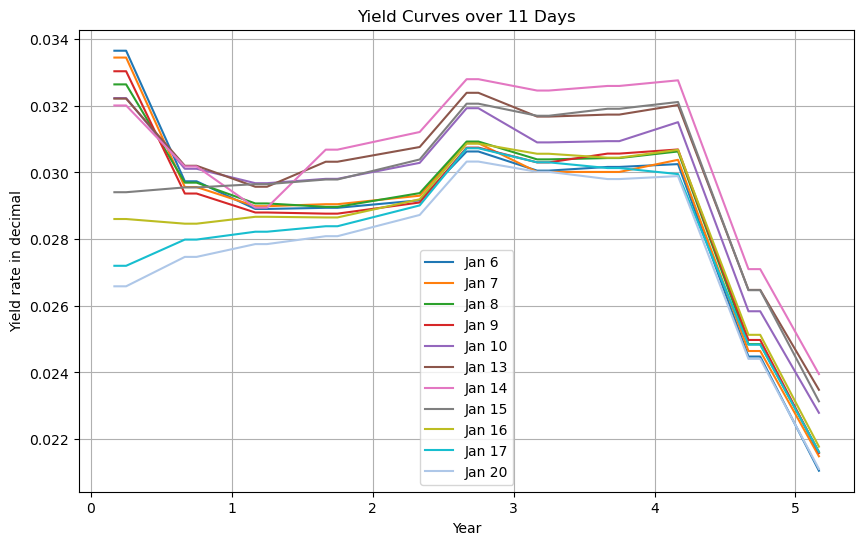

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Obtain yield rates of bonds for different days
d6_yield = yield_on_day(bonds6)
d7_yield = yield_on_day(bonds7)
d8_yield = yield_on_day(bonds8)
d9_yield = yield_on_day(bonds9)
d10_yield = yield_on_day(bonds10)
d13_yield = yield_on_day(bonds13)
d14_yield = yield_on_day(bonds14)
d15_yield = yield_on_day(bonds15)
d16_yield = yield_on_day(bonds16)
d17_yield = yield_on_day(bonds17)
d20_yield = yield_on_day(bonds20)

#Obtaining x values
x = []
i = 0
for yields in d6_yield:
    i+=1
    if yields != 0:
        x.append(i/12)

#remove zeros
d6_nonzero = [val for val in d6_yield if val != 0]
d7_nonzero = [val for val in d7_yield if val != 0]
d8_nonzero = [val for val in d8_yield if val != 0]
d9_nonzero = [val for val in d9_yield if val != 0]
d10_nonzero = [val for val in d10_yield if val != 0]
d13_nonzero = [val for val in d13_yield if val != 0]
d14_nonzero = [val for val in d14_yield if val != 0]
d15_nonzero = [val for val in d15_yield if val != 0]
d16_nonzero = [val for val in d16_yield if val != 0]
d17_nonzero = [val for val in d17_yield if val != 0]
d20_nonzero = [val for val in d20_yield if val != 0]



# # Plot
plt.figure(figsize=(10, 6)) 
plt.plot(x, d6_nonzero, color='#1f77b4', label = 'Jan 6')
plt.plot(x, d7_nonzero, color='#ff7f0e', label = 'Jan 7')
plt.plot(x, d8_nonzero, color='#2ca02c', label = 'Jan 8')
plt.plot(x, d9_nonzero, color='#d62728', label = 'Jan 9')
plt.plot(x, d10_nonzero, color='#9467bd', label = 'Jan 10')
plt.plot(x, d13_nonzero, color='#8c564b', label = 'Jan 13')
plt.plot(x, d14_nonzero, color='#e377c2', label = 'Jan 14')
plt.plot(x, d15_nonzero, color='#7f7f7f', label = 'Jan 15')
plt.plot(x, d16_nonzero, color='#bcbd22', label = 'Jan 16')
plt.plot(x, d17_nonzero, color='#17becf', label = 'Jan 17')
plt.plot(x, d20_nonzero, color='#aec7e8', label = 'Jan 20')


# Labels and Title
plt.xlabel("Year")
plt.ylabel("Yield rate in decimal")
plt.title("Yield Curves over 11 Days")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Code tests
dirty price generation:
```
def dirty(bonds):
    ret_p = []
    for bond in bonds:
        coupon_interest = bond[1]
        time = last_coupon_to_data_date_days(bond[3],bond[4])
        accured_interest = time/365 * (coupon_interest * 100)
        dirty_price = bond[0] + accured_interest
        ret_p.append(dirty_price)
    return ret_p

dirty = dirty(bonds6)
print(dirty)
```
The result aligns with manual calculation. For example, the output is(100.06,98.53,97.051)

# Part (B)
- Spot rate

In [5]:
def spot_on_day(bonds):
    ret_spot = [0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,0,0]
    i = 0
    for bond in bonds:
        coupon_interest = bond[1]
        time_since_coupon = last_coupon_to_data_date_days(bond[3],bond[4])
        accured_interest = (time_since_coupon/365) * (coupon_interest * 100)
        dirty_price = bond[0] + accured_interest
        coupon = 100*coupon_interest/2
        
        
        #B1 - Zero bond, [[coupon months], maturity months] = [(),2]
        if i == 0:
            r2 = ((100+coupon)/dirty_price)**(12/2) -1
            ret_spot[1] = r2

        
        #B2 - [(3),8]
        if i == 1:
            r3 = ret_spot[1]
            ret_spot[2] = r3 #Approximate by previous value
            r8 = ((coupon + 100)/(dirty_price - coupon*((1/(1+r3))**(3/12))))**(12/8) - 1
            ret_spot[7] = r8
        
        #B3 - [[3, 9], 14]
        if i == 2:
            r3 = ret_spot[2]
            r9 = ret_spot[7]
            ret_spot[8] = r9 #Approximate by previous
            r14 = ((coupon + 100)/(dirty_price - coupon*((1/(1+r3))**(3/12) + (1/(1+r9))**(9/12))))**(12/14) - 1
            ret_spot[13] = r14
        
        #B4 - [[3, 9, 15], 20]
        if i == 3:
            r3 = ret_spot[2]
            r9 = ret_spot[9]
            r15 = ret_spot[13] #Approximate by previous
            ret_spot[14] = r15
            r20 = ((coupon + 100)/(dirty_price - coupon*((1/(1+r3))**(3/12) + (1/(1+r9))**(9/12) + (1/(1+r15))**(15/12))))**(12/20) - 1
            ret_spot[19] = r20
            
        #B5 - [[3, 9, 15, 21], 26]
        if i == 4:
            r3 = ret_spot[2]
            r9 = ret_spot[9]
            r15 = ret_spot[14]
            r21 = ret_spot[19] #Approximate by previous
            ret_spot[20] = r21
            r26 = ((coupon + 100)/(dirty_price - coupon*((1/(1+r3))**(3/12) + (1/(1+r9))**(9/12) + (1/(1+r15))**(15/12) + (1/(1+r21))**(21/12))))**(12/26) - 1
            ret_spot[25] = r26
            
        #B6 - [[4, 10, 16, 22, 28], 32]
        if i == 5:
            ret_spot[3] = linear_interpolate(3,ret_spot[2],8,ret_spot[7],4)
            ret_spot[9] = linear_interpolate(9,ret_spot[8],14,ret_spot[13],10)
            ret_spot[15] = linear_interpolate(15,ret_spot[14],20,ret_spot[19],16)
            ret_spot[21] = linear_interpolate(21,ret_spot[20],26,ret_spot[25],22)
            ret_spot[26] = linear_interpolate(21,ret_spot[20],26,ret_spot[25],27) #Extending previous linear trend
            ret_spot[27] = linear_interpolate(21,ret_spot[20],26,ret_spot[25],28) #Extending previous linear trend
            r4 = ret_spot[3]
            r10 = ret_spot[9]
            r16 = ret_spot[15]
            r22 = ret_spot[21]
            r28 = ret_spot[27]
            r32 = ((coupon + 100)/(dirty_price - coupon*((1/(1+r4))**(4/12) + (1/(1+r10))**(10/12) + (1/(1+r16))**(16/12) + (1/(1+r22))**(22/12) + (1/(1+r28)**(28/12)))))**(12/32) - 1
            ret_spot[31] = r32
            
        #B7 - [[3, 9, 15, 21, 27, 33], 38]
        if i == 6:
            r3 = ret_spot[2]
            r9 = ret_spot[8]
            r15 = ret_spot[13]
            r21 = ret_spot[20]
            r27 = ret_spot[26]
            r33 = ret_spot[31] #Approximate by previous value
            ret_spot[32] = r33
            r38 = ((coupon + 100)/(dirty_price - coupon*((1/(1+r3))**(3/12) + (1/(1+r9))**(9/12) + (1/(1+r15))**(15/12) + (1/(1+r21))**(21/12) + (1/(1+r27))**(27/12) + (1/(1+r33))**(33/12))))**(12/38) - 1
            ret_spot[37] = r38
        
        #B8 - [[3, 9, 15, 21, 27, 33, 39], 44]
        if i == 7:
            r3 = ret_spot[2]
            r9 = ret_spot[8]
            r15 = ret_spot[13]
            r21 = ret_spot[20]
            r27 = ret_spot[26]
            r33 = ret_spot[32]
            r39 = ret_spot[37] #Approximate by previous value
            ret_spot[38] = r39
            r44 = ((coupon + 100)/(dirty_price - coupon*((1/(1+r3))**(3/12) + (1/(1+r9))**(9/12) + (1/(1+r15))**(15/12) + (1/(1+r21))**(21/12) + (1/(1+r27))**(27/12) + (1/(1+r33))**(33/12)+ (1/(1+r39))**(39/12))))**(12/44) - 1
            ret_spot[43] = r44
            
        #B9 - [[3, 9, 15, 21, 27, 33, 39, 45], 50]
        if i == 8:
            r3 = ret_spot[2]
            r9 = ret_spot[8]
            r15 = ret_spot[13]
            r21 = ret_spot[20]
            r27 = ret_spot[26]
            r33 = ret_spot[32]
            r39 = ret_spot[38]
            r45 = ret_spot[43] #Approximate by previous value
            ret_spot[44] = r45
            r50 = ((coupon + 100)/(dirty_price - coupon*((1/(1+r3))**(3/12) + (1/(1+r9))**(9/12) + (1/(1+r15))**(15/12) + (1/(1+r21))**(21/12) + (1/(1+r27))**(27/12) + (1/(1+r33))**(33/12)+ (1/(1+r39))**(39/12) + (1/(1+r45))**(45/12))))**(12/50) - 1
            ret_spot[49] = r50
            
        #B10 - [[3, 9, 15, 21, 27, 33, 39, 45, 51], 56]
        if i == 9:
            r3 = ret_spot[2]
            r9 = ret_spot[8]
            r15 = ret_spot[13]
            r21 = ret_spot[20]
            r27 = ret_spot[26]
            r33 = ret_spot[32]
            r39 = ret_spot[38]
            r45 = ret_spot[44]
            r51 = ret_spot[49] #Approximate by previous value
            ret_spot[50] = r51
            r56 = ((coupon + 100)/(dirty_price - coupon*((1/(1+r3))**(3/12) + (1/(1+r9))**(9/12) + (1/(1+r15))**(15/12) + (1/(1+r21))**(21/12) + (1/(1+r27))**(27/12) + (1/(1+r33))**(33/12)+ (1/(1+r39))**(39/12) + (1/(1+r45))**(45/12)+ (1/(1+r51))**(51/12))))**(12/56) - 1
            ret_spot[55] = r56
        
        #B11 - [[3, 9, 15, 21, 27, 33, 39, 45, 51, 57], 62]
        if i == 10:
            r3 = ret_spot[2]
            r9 = ret_spot[8]
            r15 = ret_spot[13]
            r21 = ret_spot[20]
            r27 = ret_spot[26]
            r33 = ret_spot[32]
            r39 = ret_spot[38]
            r45 = ret_spot[44]
            r51 = ret_spot[50]
            r57 = ret_spot[55] #Approximate by previous value
            ret_spot[56] = r57
            r62 = ((coupon + 100)/(dirty_price - coupon*((1/(1+r3))**(3/12) + (1/(1+r9))**(9/12) + (1/(1+r15))**(15/12) + (1/(1+r21))**(21/12) + (1/(1+r27))**(27/12) + (1/(1+r33))**(33/12)+ (1/(1+r39))**(39/12) + (1/(1+r45))**(45/12)+ (1/(1+r51))**(51/12)+ (1/(1+r57))**(57/12))))**(12/62) - 1
            ret_spot[61] = r62
        i+=1
    return ret_spot

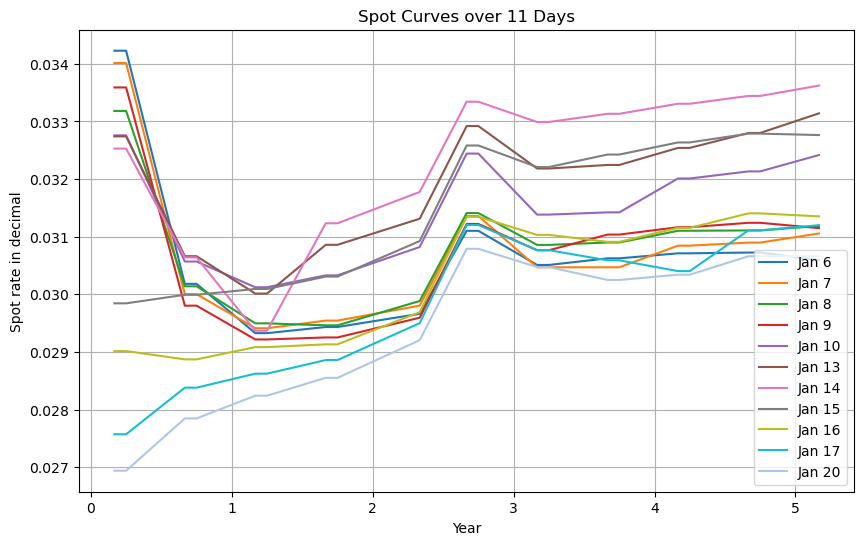

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Obtain yield rates of bonds for different days
d6_spot = spot_on_day(bonds6)
d7_spot = spot_on_day(bonds7)
d8_spot = spot_on_day(bonds8)
d9_spot = spot_on_day(bonds9)
d10_spot = spot_on_day(bonds10)
d13_spot = spot_on_day(bonds13)
d14_spot = spot_on_day(bonds14)
d15_spot = spot_on_day(bonds15)
d16_spot = spot_on_day(bonds16)
d17_spot = spot_on_day(bonds17)
d20_spot = spot_on_day(bonds20)

#Obtaining x values
x = []
i = 0
for spot in d6_spot:
    i+=1
    if spot != 0:
        x.append(i/12)

#remove zeros
d6_nonzero = [val for val in d6_spot if val != 0]
d7_nonzero = [val for val in d7_spot if val != 0]
d8_nonzero = [val for val in d8_spot if val != 0]
d9_nonzero = [val for val in d9_spot if val != 0]
d10_nonzero = [val for val in d10_spot if val != 0]
d13_nonzero = [val for val in d13_spot if val != 0]
d14_nonzero = [val for val in d14_spot if val != 0]
d15_nonzero = [val for val in d15_spot if val != 0]
d16_nonzero = [val for val in d16_spot if val != 0]
d17_nonzero = [val for val in d17_spot if val != 0]
d20_nonzero = [val for val in d20_spot if val != 0]



# # Plot
plt.figure(figsize=(10, 6)) 
plt.plot(x, d6_nonzero, color='#1f77b4', label = 'Jan 6')
plt.plot(x, d7_nonzero, color='#ff7f0e', label = 'Jan 7')
plt.plot(x, d8_nonzero, color='#2ca02c', label = 'Jan 8')
plt.plot(x, d9_nonzero, color='#d62728', label = 'Jan 9')
plt.plot(x, d10_nonzero, color='#9467bd', label = 'Jan 10')
plt.plot(x, d13_nonzero, color='#8c564b', label = 'Jan 13')
plt.plot(x, d14_nonzero, color='#e377c2', label = 'Jan 14')
plt.plot(x, d15_nonzero, color='#7f7f7f', label = 'Jan 15')
plt.plot(x, d16_nonzero, color='#bcbd22', label = 'Jan 16')
plt.plot(x, d17_nonzero, color='#17becf', label = 'Jan 17')
plt.plot(x, d20_nonzero, color='#aec7e8', label = 'Jan 20')


# Labels and Title
plt.xlabel("Year")
plt.ylabel("Spot rate in decimal")
plt.title("Spot Curves over 11 Days")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Part (c)
- Forwards

In [7]:
def forward_on_day(bonds):
    """
    Returns a list of 4 forward rates beginning from year 1
    forward_on_day(bonds) -> [Y_{1-2}, Y_{1-3}, Y_{1-4}, Y_{1-5}]
    """
    ret_forwards = []
    spot_rates = spot_on_day(bonds)
    spot_1 = linear_interpolate(9, spot_rates[8], 14, spot_rates[13],12)
    for i in range(4):
        n = i+1
        t_plus_n = i+2
        spot_nom = linear_interpolate(12*t_plus_n-3, spot_rates[12*t_plus_n-4], 12*t_plus_n+2, spot_rates[12*t_plus_n+1],12*t_plus_n)
        forward = (((1+spot_nom)**(2*t_plus_n))/((1+spot_1)**(2)))**(1/(2*n)) - 1 
        ret_forwards.append(forward)
    return ret_forwards

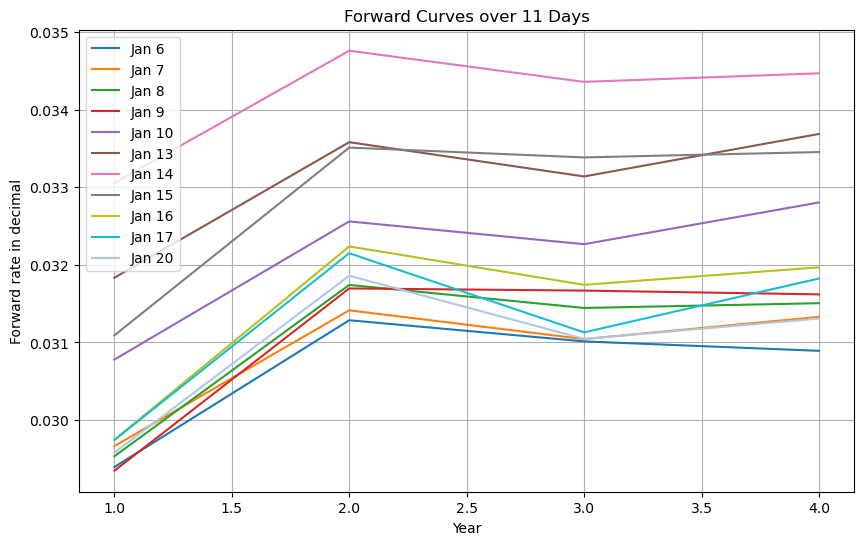

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Obtain yield rates of bonds for different days
d6_forward = forward_on_day(bonds6)
d7_forward = forward_on_day(bonds7)
d8_forward = forward_on_day(bonds8)
d9_forward = forward_on_day(bonds9)
d10_forward = forward_on_day(bonds10)
d13_forward = forward_on_day(bonds13)
d14_forward = forward_on_day(bonds14)
d15_forward = forward_on_day(bonds15)
d16_forward = forward_on_day(bonds16)
d17_forward = forward_on_day(bonds17)
d20_forward = forward_on_day(bonds20)

#Obtaining x values
x = [1,2,3,4]

# Plot
plt.figure(figsize=(10, 6)) 
plt.plot(x, d6_forward, color='#1f77b4', label = 'Jan 6')
plt.plot(x, d7_forward, color='#ff7f0e', label = 'Jan 7')
plt.plot(x, d8_forward, color='#2ca02c', label = 'Jan 8')
plt.plot(x, d9_forward, color='#d62728', label = 'Jan 9')
plt.plot(x, d10_forward, color='#9467bd', label = 'Jan 10')
plt.plot(x, d13_forward, color='#8c564b', label = 'Jan 13')
plt.plot(x, d14_forward, color='#e377c2', label = 'Jan 14')
plt.plot(x, d15_forward, color='#7f7f7f', label = 'Jan 15')
plt.plot(x, d16_forward, color='#bcbd22', label = 'Jan 16')
plt.plot(x, d17_forward, color='#17becf', label = 'Jan 17')
plt.plot(x, d20_forward, color='#aec7e8', label = 'Jan 20')


# Labels and Title
plt.xlabel("Year")
plt.ylabel("Forward rate in decimal")
plt.title("Forward Curves over 11 Days")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Q5
- Covariance Matrices

In [9]:
# Helper to return a list of 5 yields
def five_years_yields_on_day(bonds):
    """
    five_years_yields_on_day(bonds) -> [y_1, y_2, y_3, y_4, y_5], where y_n is the n-th year yield rate.
    """
    ret_yields = []
    yield_rates = yield_on_day(bonds)
    for i in range(5):
        n = i+1
        yield_n = linear_interpolate(12*n-3, yield_rates[12*n-4], 12*n+2, yield_rates[12*n+1],12*n)
        ret_yields.append(yield_n)
    return ret_yields


In [10]:
# Obtaining the Yields-Covariance Matrix
def yield_cov_matrix():
    day6_yields = five_years_yields_on_day(bonds6)
    day7_yields = five_years_yields_on_day(bonds7)
    day8_yields = five_years_yields_on_day(bonds8)
    day9_yields = five_years_yields_on_day(bonds9)
    day10_yields = five_years_yields_on_day(bonds10)
    day13_yields = five_years_yields_on_day(bonds13)
    day14_yields = five_years_yields_on_day(bonds14)
    day15_yields = five_years_yields_on_day(bonds15)
    day16_yields = five_years_yields_on_day(bonds16)
    day17_yields = five_years_yields_on_day(bonds17)
    
    daily_yields = [day6_yields,day7_yields,day8_yields,day9_yields,day10_yields,day13_yields,day14_yields,day15_yields,day16_yields,day17_yields]
    #Intialize
    yield_matrix = np.zeros((9,5))
    
    #Loop
    for i in range(5):
        for j in range(8):
            yield_matrix[j,i] = math.log(daily_yields[j+1][i]/daily_yields[j][i])
            
    cov_matrix = np.cov(yield_matrix, rowvar=False)
    return cov_matrix


In [11]:
yield_cov_matrix()

array([[0.00028507, 0.00026936, 0.00021964, 0.00022373, 0.00035916],
       [0.00026936, 0.0005365 , 0.00047252, 0.00047625, 0.00069911],
       [0.00021964, 0.00047252, 0.00044066, 0.00046219, 0.00063269],
       [0.00022373, 0.00047625, 0.00046219, 0.00051021, 0.00066203],
       [0.00035916, 0.00069911, 0.00063269, 0.00066203, 0.00094545]])

In [12]:
# Obtaining forward_cov_matrix
def forward_cov_matrix():
    d6_forward = forward_on_day(bonds6)
    d7_forward = forward_on_day(bonds7)
    d8_forward = forward_on_day(bonds8)
    d9_forward = forward_on_day(bonds9)
    d10_forward = forward_on_day(bonds10)
    d13_forward = forward_on_day(bonds13)
    d14_forward = forward_on_day(bonds14)
    d15_forward = forward_on_day(bonds15)
    d16_forward = forward_on_day(bonds16)
    d17_forward = forward_on_day(bonds17)
    d20_forward = forward_on_day(bonds20)
    
    daily_forwards = [d6_forward, d7_forward, d8_forward, d9_forward, d10_forward, d13_forward, d14_forward, d15_forward, d16_forward, d17_forward]
    #Intialize
    forward_matrix = np.zeros((9,4))
    
    #Loop
    for i in range(4):
        for j in range(8):
            forward_matrix[j,i] = math.log(daily_forwards[j+1][i]/daily_forwards[j][i])
            
    cov_matrix = np.cov(forward_matrix, rowvar=False)
    return cov_matrix

In [13]:
forward_cov_matrix()

array([[0.00133373, 0.00094264, 0.00087811, 0.00092391],
       [0.00094264, 0.0007167 , 0.00070376, 0.00068146],
       [0.00087811, 0.00070376, 0.00073683, 0.00067505],
       [0.00092391, 0.00068146, 0.00067505, 0.00070681]])

# Q6 
-PCA's

In [14]:
#Yields PCA
yield_PCA_matrix = yield_cov_matrix()
np.set_printoptions(suppress=True, precision=7)


eigenvalues, eigenvectors = np.linalg.eigh(yield_PCA_matrix)
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]*10**3
eigenvectors = eigenvectors[:, sorted_idx]
weights = eigenvalues / np.sum(eigenvalues)
print("Yields PCA\n")
print("Eigenvalues(x10^3) :", eigenvalues)
print("Weights            :", weights)
print("Eigenvectors:\n", eigenvectors)

Yields PCA

Eigenvalues(x10^3) : [2.5043592 0.1598435 0.0423223 0.0100028 0.0013635]
Weights            : [0.9214346 0.0588116 0.0155717 0.0036804 0.0005017]
Eigenvectors:
 [[-0.2391698 -0.9330329 -0.2452703  0.1059514  0.0293965]
 [-0.4550173 -0.0191463  0.6175948  0.3777161 -0.5181698]
 [-0.4146942  0.1993479 -0.0369325  0.5382575  0.7051269]
 [-0.4348362  0.2971123 -0.7251037  0.0775076 -0.4368741]
 [-0.6121302  0.0326753  0.176861  -0.7418735  0.2063321]]


In [15]:
#Forward PCA
forward_PCA_matrix = forward_cov_matrix()

eigenvalues, eigenvectors = np.linalg.eigh(forward_PCA_matrix)
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]*10**3
eigenvectors = eigenvectors[:, sorted_idx]
weights = eigenvalues / np.sum(eigenvalues)
print("Forward PCA\n")
print("Eigenvalues(x10^3) :", eigenvalues)
print("Weights            :", weights)
print("Eigenvectors:\n", eigenvectors)

Forward PCA

Eigenvalues(x10^3) : [3.3434189 0.1117427 0.0352917 0.0036174]
Weights            : [0.9568836 0.0319807 0.0101005 0.0010353]
Eigenvectors:
 [[-0.6192413 -0.6654977 -0.2210239 -0.3532725]
 [-0.4596146  0.1492204 -0.4034775  0.7769772]
 [-0.4494661  0.7305585 -0.1591284 -0.4888176]
 [-0.4508601  0.0336213  0.8735173  0.1804503]]
